example for how to use double ended connect to connect the minima in an existing database

we will use as an example system the Lennard-Jones cluster with a small number of atoms.
Since we don't already have a database, for this example we'll build a small one using
basinhopping

In [1]:
from pele.systems import LJCluster
from pele.utils.disconnectivity_graph import DisconnectivityGraph, database2graph
%matplotlib inline
natoms = 16
system = LJCluster(natoms)

will compute the lowest eigenvector by diagonalizing the Hessian


In [2]:
system

create the database where the minima and transition states will be stored

In [3]:
pwd

u'/home/wk3user2/plc/free_energy/disconnectivity_graph'

In [4]:
db = system.create_database()

use basinhopping to build a database of minima

In [17]:
bh = system.get_basinhopping(database=db, outstream=None)
bh.run(100)

In [18]:
print "number of minima", db.number_of_minima()
print "number of transition states", db.number_of_transition_states()

number of minima 21
number of transition states 0


use the logging module to turn of status printing for the connect runs

In [19]:
import logging
logger = logging.getLogger("pele.connect")
logger.setLevel("WARNING")

do a bunch of double ended connect runs to find transition states connecting the minima

In [20]:
from pele.landscape import ConnectManager
manager = ConnectManager(db)
for i in xrange(20):
    min1, min2 = manager.get_connect_job()
    connect = system.get_double_ended_connect(min1, min2, db, verbosity=-1)
    connect.connect()

sending a random connect job 3 2
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -55.0796173997 -> -55.0985081269
will compute the lowest eigenvector by diagonalizing the Hessian
stepping off the transition state resulted in twice the same minima 2
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 22 4
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
stepping off the transition state resulted in twice the same minima 2
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector

now that we have a database with minima and transition states we can build the disconnectivity graph

print some information about the database

In [21]:
print "number of minima", db.number_of_minima()
print "number of transition states", db.number_of_transition_states()

number of minima 30
number of transition states 27


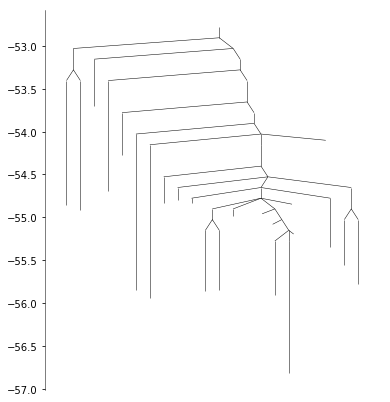

In [22]:
graph = database2graph(db)
dgraph = DisconnectivityGraph(graph)
dgraph.calculate()
dgraph.plot()
import matplotlib.pyplot as plt
plt.show()